<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the dataset (CO<sub>2</sub> emission data)

In the dataset, the CO<sub>2</sub> emission for various regions in the world is given. Our objective is to group the regions based on the factors affecting the environment in terms of the greenhouse gases, where CO<sub>2</sub> is a primary greenhouse gas. 

Many developing and developed countries in the world are contributing to the CO<sub>2</sub> emission in the environment. It is interesting to know that the increase in atmospheric carbon dioxide is responsible for about two-thirds of the total energy imbalance that is causing Earth's temperature to rise and leads to global warming.

**Region**: Region of the country

**CO2 Emission**: Annual CO<sub>2</sub> emission (in tonnes)

**Ease of Business**: The ease of business in the country

**Energy Usage**: Energy used by the country in various forms

**GDP**: GDP of a country

**Internet Usage**: Usage of the internet 

**Population total**: Total population of a country

## Table of Content

1. **[Exploratory Data Analysis](#lib)**
2. **[Hierarchical Clustering](#hie)**
3. **[DBSCAN](#DBSCAN)**

#### Import the required libraries

In [1]:
# write your code here
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# write your code here
# load the excel file
# store the data in 'df_prod'
df = pd.read_csv('CO2_emission_data.csv')

# display first five observations using head()
df.head()

,Region,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
0,Europe,4294,151,1976,5.652325e+09,0.010,3033659
1,Europe,4166,151,2172,7.464447e+09,0.024,3014579
2,Europe,4254,151,2172,8.376484e+09,0.060,2992724
3,Europe,3865,151,2068,9.132562e+09,0.096,2968028
4,Europe,4056,151,2025,1.070101e+10,0.150,2940880



### Let's begin with some hands-on practice exercises

<a id="lib"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify the different regions to which the countries belong and visualize the count of countries.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# Identify unique regions
unique_regions = df['Region'].unique()
print("Unique Regions:", unique_regions)

# Count the number of countries in each region
region_counts = df['Region'].value_counts()

# Display the counts
print(region_counts)

Unique Regions: ['Europe' 'Africa' 'The Americas' 'Asia' 'Oceania' 'Middle East']
Region
Europe          302
The Americas    289
Africa          254
Asia            244
Middle East      92
Oceania          62
Name: count, dtype: int64


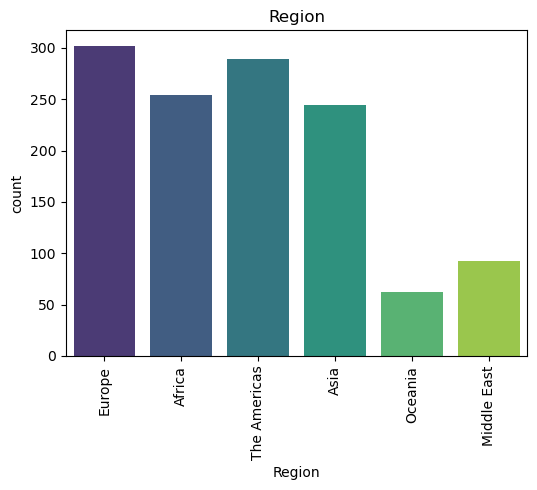

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axs = axs.flatten()  # Flatten the 2D array of axes for easy indexing

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index  # Get top 6 values
    filtered_df = df[df[var].isin(top_values)]  # Filter DataFrame
    sns.countplot(x=var, data=filtered_df, ax=axs[i], palette='viridis')  # Create count plot
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for j in range(num_cols, len(axs)):
        fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype, dimension and summary statistics of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('CO2_emission_data.csv')

# Check the data types of each column
data_types = df.dtypes
print("Data Types:")
print(data_types)
print("\n")

# Check the dimensions of the DataFrame
dimensions = df.shape
print("Dimensions (Rows, Columns):")
print(dimensions)
print("\n")

# Get summary statistics for numerical columns
summary_statistics = df.describe()
print("Summary Statistics for Numerical Columns:")
print(summary_statistics)
print("\n")

# Get summary statistics for categorical columns
categorical_summary = df.describe(include='object')
print("Summary Statistics for Categorical Columns:")
print(categorical_summary)


Data Types:
Region               object
CO2 Emissions         int64
Ease of Business      int64
Energy Usage          int64
GDP                 float64
Internet Usage      float64
Population Total      int64
dtype: object


Dimensions (Rows, Columns):
(1243, 7)


Summary Statistics for Numerical Columns:
       CO2 Emissions  Ease of Business  Energy Usage           GDP  \
count   1.243000e+03       1243.000000  1.243000e+03  1.243000e+03   
mean    1.897666e+05         88.279968  7.541842e+04  3.535548e+11   
std     7.697027e+05         52.770388  2.707586e+05  1.358970e+12   
min     4.800000e+01          1.000000  3.000000e+01  1.232585e+08   
25%     3.111500e+03         45.000000  2.721000e+03  7.746581e+09   
50%     1.620800e+04         85.000000  9.318000e+03  2.468037e+10   
75%     7.581200e+04        131.000000  3.495650e+04  1.770000e+11   
max     8.286892e+06        186.000000  2.727728e+06  1.620000e+13   

       Internet Usage  Population Total  
count     1236.000000

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Drop the variables 'Region', 'Ease of Business', 'Internet Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# Drop specified columns from the DataFrame
df_cleaned = df.drop(columns=['Region', 'Ease of Business', 'Internet Usage'])

# Display the first few rows of the cleaned DataFrame
print(df_cleaned.head())

# Optionally, check the new shape of the DataFrame
print("New Dimensions (Rows, Columns):", df_cleaned.shape)


   CO2 Emissions  Energy Usage           GDP  Population Total
0           4294          1976  5.652325e+09           3033659
1           4166          2172  7.464447e+09           3014579
2           4254          2172  8.376484e+09           2992724
3           3865          2068  9.132562e+09           2968028
4           4056          2025  1.070101e+10           2940880
New Dimensions (Rows, Columns): (1243, 4)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if there are missing values, if yes then remove the observations with missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# Check for missing values in the DataFrame
missing_values = df_cleaned.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# If there are missing values, remove the rows with any missing values
if missing_values.any():
    df_cleaned = df_cleaned.dropna()
    print("\nMissing values were found and removed.")
else:
    print("\nNo missing values found.")

# Display the new shape of the DataFrame after removing missing values
print("New Dimensions (Rows, Columns):", df_cleaned.shape)


Missing Values in Each Column:
CO2 Emissions       0
Energy Usage        0
GDP                 0
Population Total    0
dtype: int64

No missing values found.
New Dimensions (Rows, Columns): (1243, 4)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Check if there are outliers in the data and visualize the outliers using a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

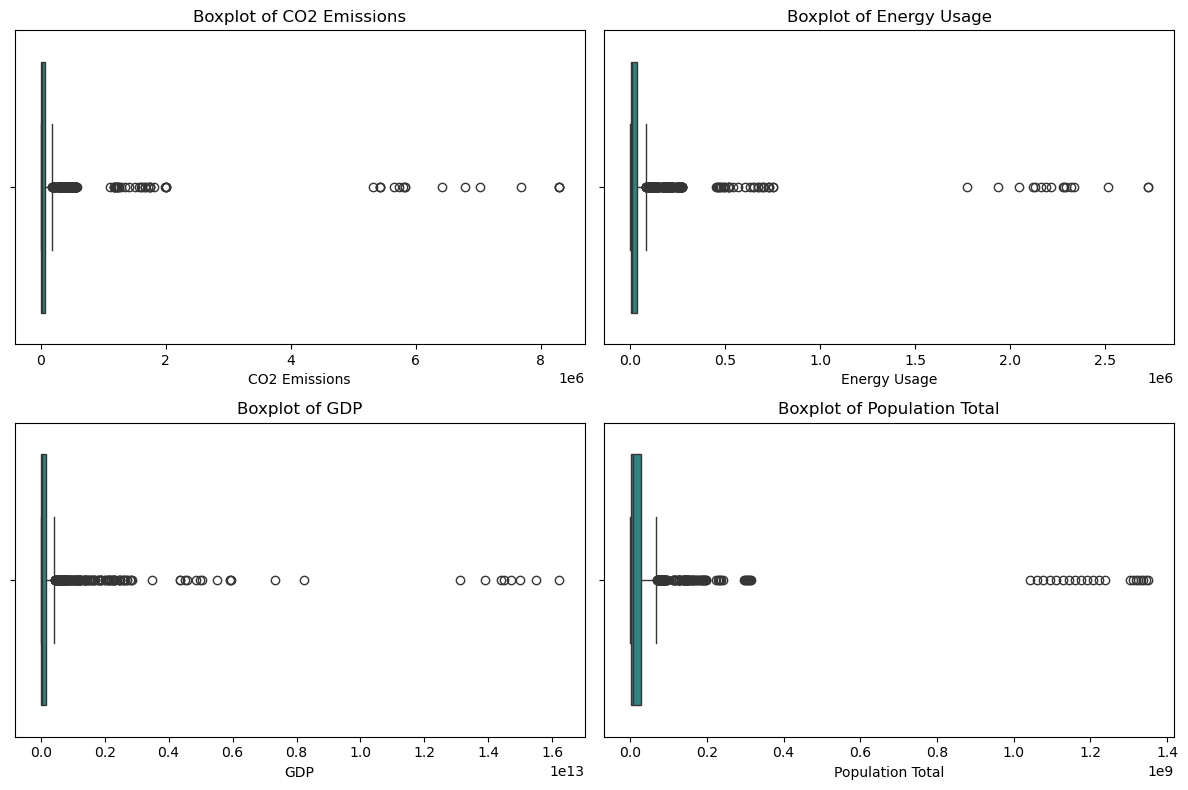

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create boxplots for each numerical variable
numerical_vars = ['CO2 Emissions', 'Energy Usage', 'GDP', 'Population Total']

for var in numerical_vars:
    plt.subplot(2, 2, numerical_vars.index(var) + 1)  # Create a subplot for each variable
    sns.boxplot(x=df_cleaned[var], palette='viridis')
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)

# Adjust the layout
plt.tight_layout()
plt.show()


In [9]:
# Function to identify outliers using IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in each numerical column
outlier_summary = {}
for var in numerical_vars:
    outliers = identify_outliers(df_cleaned, var)
    outlier_summary[var] = outliers.shape[0]  # Count of outliers

# Display the count of outliers for each variable
print("Count of Outliers in Each Variable:")
print(outlier_summary)


Count of Outliers in Each Variable:
{'CO2 Emissions': 197, 'Energy Usage': 192, 'GDP': 171, 'Population Total': 139}


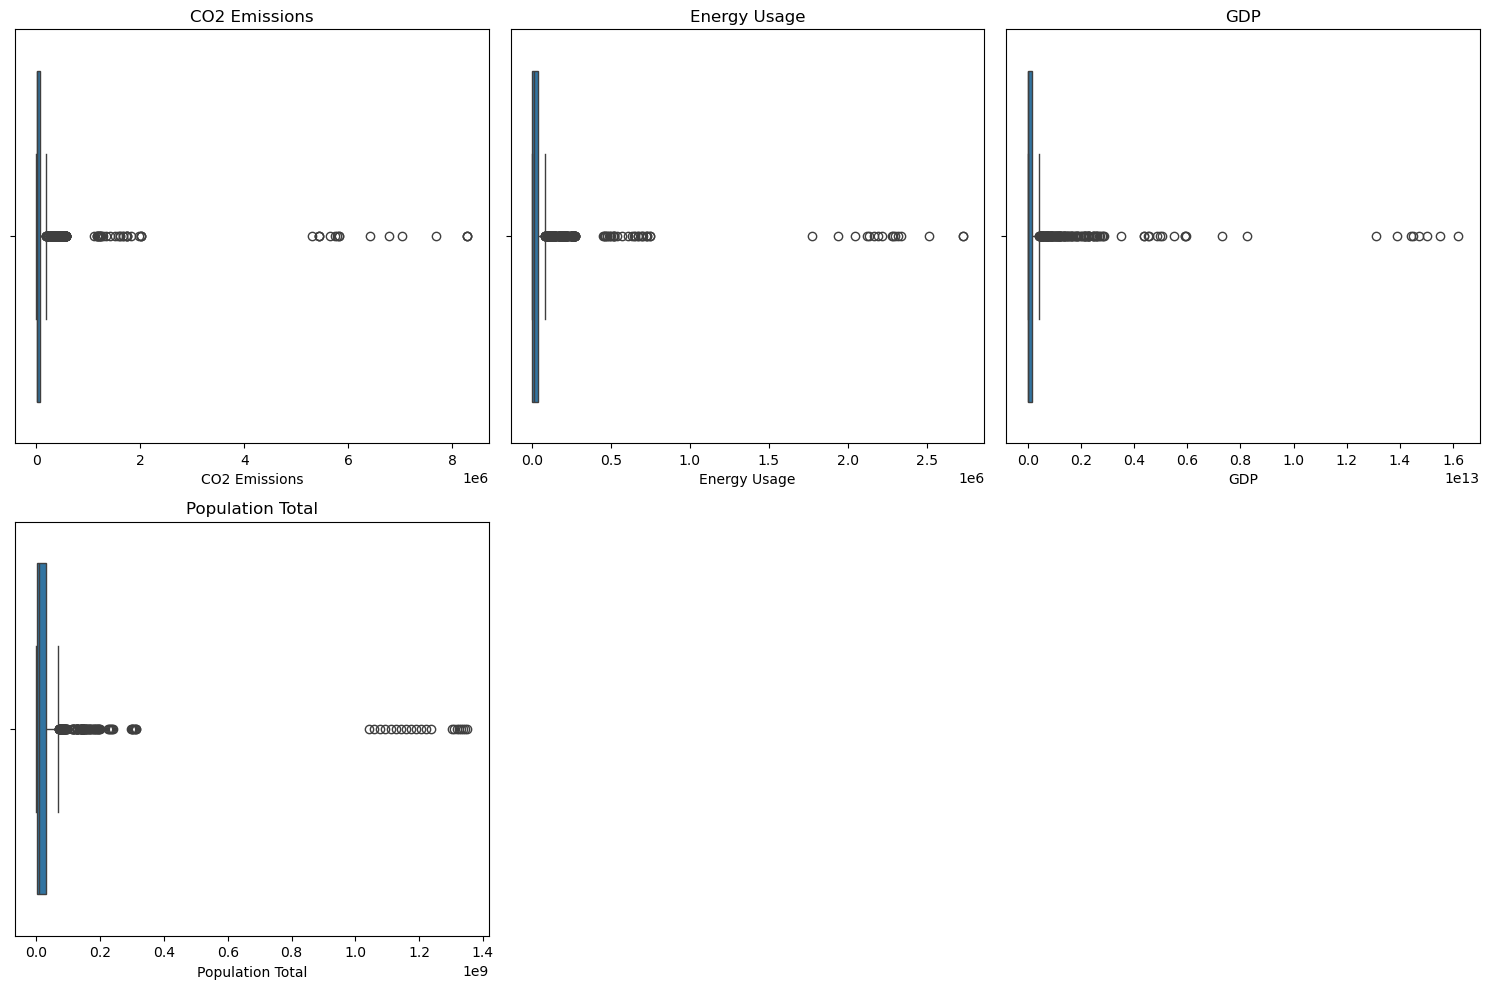

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the specific numerical variables you want to plot
numerical_vars = ['CO2 Emissions', 'Energy Usage', 'GDP', 'Population Total']

# Create a figure with subplots
num_cols = len(numerical_vars)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()  # Flatten the 2D array of axes for easy indexing

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(numerical_vars):
    sns.boxplot(x=df_cleaned[var], ax=axs[i])  # Create box plot
    axs[i].set_title(var)  # Set the title for each subplot

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for j in range(num_cols, len(axs)):
        fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


In [11]:
def count_outliers(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outlier_counts[col] = outlier_count
    
    return outlier_counts

# Count outliers in the cleaned DataFrame
outlier_counts = count_outliers(df_cleaned)

# Print the count of outliers for each column
print(outlier_counts)


{'CO2 Emissions': 197, 'Energy Usage': 192, 'GDP': 171, 'Population Total': 139}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using 3.5IQR and check the shape of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# Function to remove outliers using 3.5 IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.5 * IQR
    upper_bound = Q3 + 3.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numerical variable
for var in numerical_vars:
    df_cleaned = remove_outliers_iqr(df_cleaned, var)

# Check the shape of the DataFrame after removing outliers
print("New Dimensions (Rows, Columns):", df_cleaned.shape)


New Dimensions (Rows, Columns): (924, 4)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Visualize the data obtained after removing the outliers with the help of a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

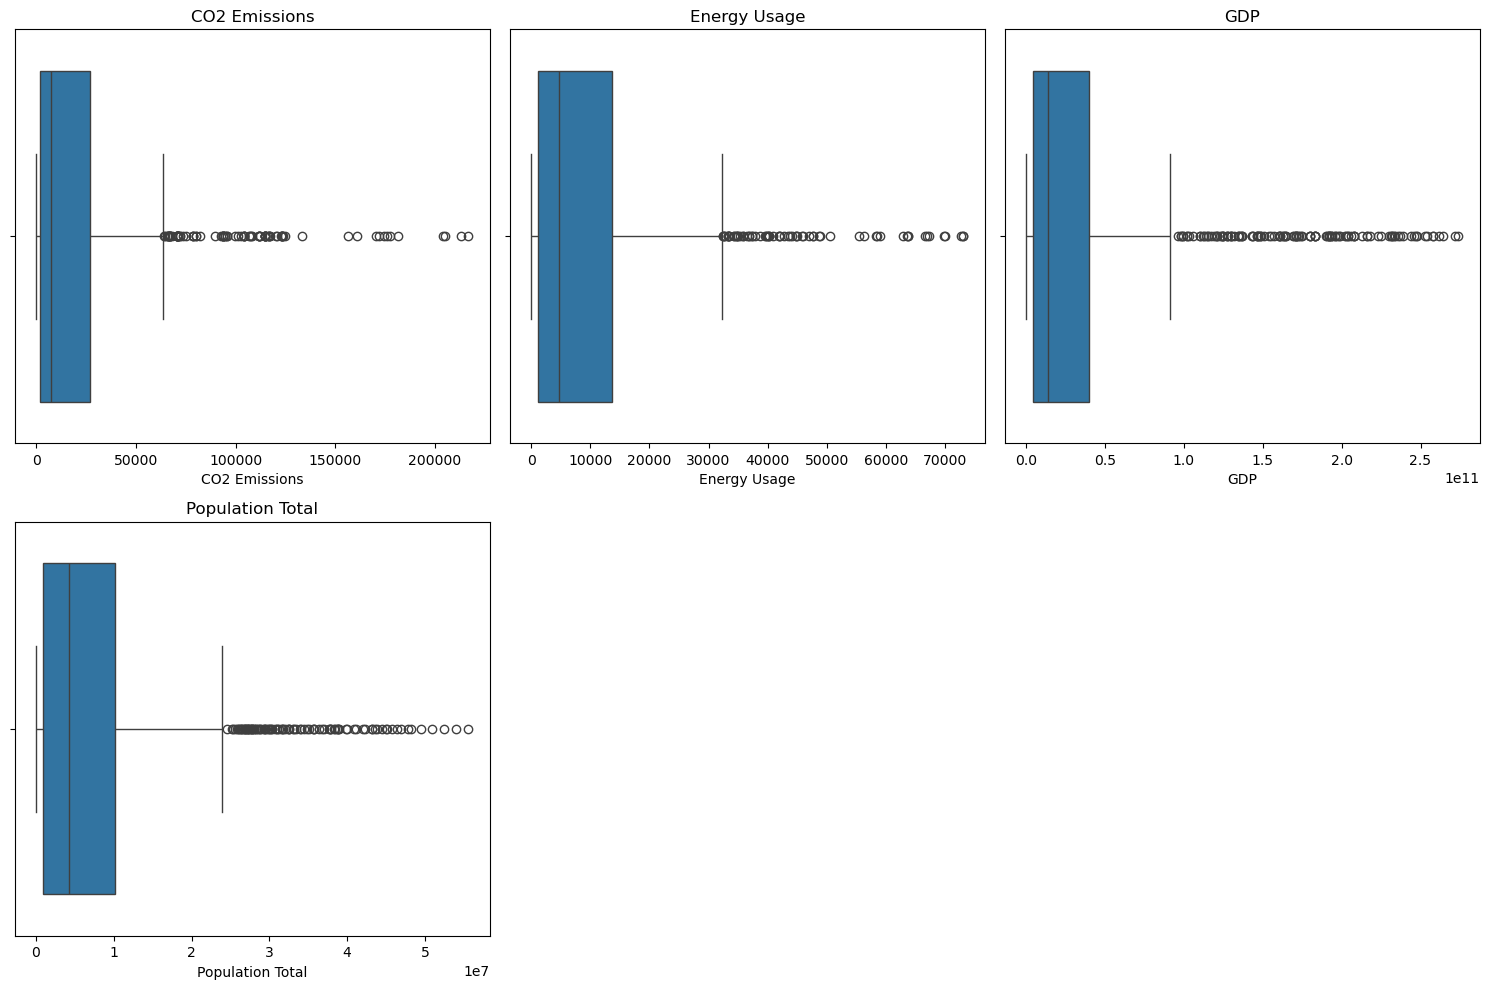

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical variables again for plotting
numerical_vars = ['CO2 Emissions', 'Energy Usage', 'GDP', 'Population Total']

# Create a figure with subplots
num_cols = len(numerical_vars)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()  # Flatten the 2D array of axes for easy indexing

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(numerical_vars):
    sns.boxplot(x=df_cleaned[var], ax=axs[i])  # Create box plot
    axs[i].set_title(var)  # Set the title for each subplot

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for j in range(num_cols, len(axs)):
        fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


In [14]:
import pandas as pd

# Function to identify outliers using 1.5 IQR method
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check for outliers in each numerical variable
outliers_dict = {}
for var in numerical_vars:
    outliers = identify_outliers_iqr(df_cleaned, var)
    outliers_dict[var] = outliers.shape[0]  # Count of outliers

# Display the count of outliers for each variable
print("Number of Outliers in Each Variable:")
print(outliers_dict)


Number of Outliers in Each Variable:
{'CO2 Emissions': 93, 'Energy Usage': 67, 'GDP': 128, 'Population Total': 100}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables in the standard form such that they will have mean 0 and standard deviation 1 and get the summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical variables
df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned[numerical_vars]), columns=numerical_vars)

# Get the summary statistics of the standardized DataFrame
summary_statistics = df_standardized.describe()

# Display the summary statistics
print("Summary Statistics for Standardized Variables:")
print(summary_statistics)


Summary Statistics for Standardized Variables:
       CO2 Emissions  Energy Usage           GDP  Population Total
count   9.240000e+02  9.240000e+02  9.240000e+02      9.240000e+02
mean    1.922464e-17  3.844928e-17 -2.691450e-17      7.689856e-18
std     1.000542e+00  1.000542e+00  1.000542e+00      1.000542e+00
min    -6.588974e-01 -7.689854e-01 -6.551860e-01     -7.837463e-01
25%    -6.020197e-01 -6.809844e-01 -5.839966e-01     -7.004147e-01
50%    -4.493341e-01 -4.080931e-01 -4.175389e-01     -3.892933e-01
75%     1.276036e-01  2.743459e-01  1.475403e-02      1.639081e-01
max     5.744724e+00  4.831972e+00  4.002158e+00      4.395450e+00


<a id="hie"></a>
## 2. Hierarchical Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the 'ward' linkage method and print the first 10 observations of the linkage matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
import pandas as pd
from scipy.cluster.hierarchy import linkage

# Assuming df_standardized is your standardized DataFrame
# Perform hierarchical clustering using the 'ward' method
linkage_matrix = linkage(df_standardized, method='ward')

# Convert the linkage matrix to a DataFrame for easier viewing
linkage_df = pd.DataFrame(linkage_matrix, columns=['Cluster 1', 'Cluster 2', 'Distance', 'Cluster Size'])

# Print the first 10 observations of the linkage matrix
print(linkage_df.head(10))


   Cluster 1  Cluster 2  Distance  Cluster Size
0      342.0      344.0  0.000045           2.0
1      353.0      354.0  0.000074           2.0
2       36.0       37.0  0.000168           2.0
3      343.0      345.0  0.000172           2.0
4       26.0       27.0  0.000202           2.0
5      436.0      437.0  0.000210           2.0
6      346.0      347.0  0.000215           2.0
7      729.0      731.0  0.000242           2.0
8      351.0      352.0  0.000268           2.0
9      848.0      849.0  0.000283           2.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the clusters obtained using dendrogram and find the optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

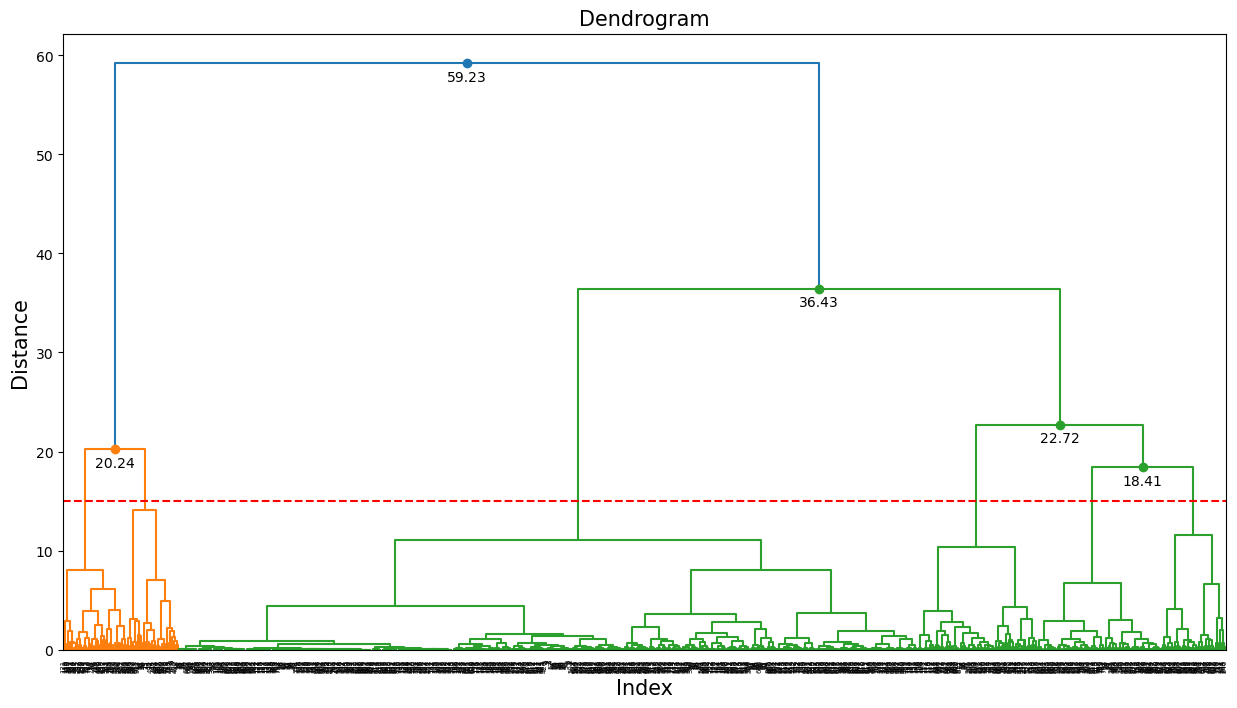

In [17]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Create a figure for the dendrogram
plt.figure(figsize=(15, 8))

# Plot the dendrogram using the linkage matrix
dendro = dendrogram(linkage_matrix)

# Annotate distances on the y-axis for distances above a certain threshold
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3]) / 2  # Average x-coordinate for merging
    y = d[1]  # Distance at which the merging occurs
    if y > 15:  # Change this threshold as needed
        plt.plot(x, y, 'o', c=c)  # Plot bullet points
        plt.annotate(f"{y:.2f}", (x, y), xytext=(0, -5), textcoords='offset points', 
                     va='top', ha='center')  # Annotate distance

# Draw a horizontal line to indicate the cut-off for clusters
plt.axhline(y=15, color='red', linestyle='--')  # Adjust y-value for your data

# Set title and labels
plt.title('Dendrogram', fontsize=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Distance', fontsize=15)

# Show the plot
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the cophenetic correlation coefficient and interpret it.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist

# Assuming df_standardized is your standardized DataFrame without outliers
# Perform hierarchical clustering using the 'ward' method
linkage_matrix = linkage(df_standardized, method='ward')

# Calculate the cophenetic correlation coefficient
c, _ = cophenet(linkage_matrix, pdist(df_standardized))

# Print the result
print(f'Cophenetic Correlation Coefficient: {c:.4f}')


Cophenetic Correlation Coefficient: 0.8282


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Instantiate clustering method with an optimal number of clusters and 'ward' linkage method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Assuming df_standardized is your standardized DataFrame without outliers
# Specify the optimal number of clusters
optimal_clusters = 5  # Replace this with the optimal number you determined

# Create the clustering model
clustering_model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')

# Fit the model to the data and add the cluster labels to the DataFrame
df_standardized['Cluster'] = clustering_model.fit_predict(df_standardized)

# Display the first few rows of the clustered data
print(df_standardized.head())


   CO2 Emissions  Energy Usage       GDP  Population Total  Cluster
0      -0.533458     -0.619878 -0.561163         -0.507255        2
1      -0.537239     -0.604860 -0.530347         -0.509035        2
2      -0.534640     -0.604860 -0.514838         -0.511073        2
3      -0.546132     -0.612829 -0.501980         -0.513377        2
4      -0.540489     -0.616123 -0.475309         -0.515910        2


In [20]:
# Adjust the number of clusters
optimal_clusters = 3  # Experiment with different values

# Create the clustering model again
clustering_model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')

# Fit the model to the data and add the cluster labels to the DataFrame
df_standardized['Cluster'] = clustering_model.fit_predict(df_standardized)

# Display the first few rows of the clustered data
print(df_standardized.head())


   CO2 Emissions  Energy Usage       GDP  Population Total  Cluster
0      -0.533458     -0.619878 -0.561163         -0.507255        2
1      -0.537239     -0.604860 -0.530347         -0.509035        2
2      -0.534640     -0.604860 -0.514838         -0.511073        2
3      -0.546132     -0.612829 -0.501980         -0.513377        2
4      -0.540489     -0.616123 -0.475309         -0.515910        2


### 13. Obtain the cluster labels and add a column containing the cluster number to the original data.

In [21]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Assuming df_standardized is your standardized DataFrame without outliers
# and you've decided on an optimal number of clusters, for example, 3.
optimal_clusters = 3  # Adjust based on your analysis

# Create the clustering model
clustering_model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')

# Fit the model and obtain cluster labels
df_standardized['Cluster'] = clustering_model.fit_predict(df_standardized)

# Add the cluster labels to the original DataFrame
df_original_with_clusters = pd.concat([df, df_standardized['Cluster']], axis=1)

# Display the updated DataFrame
print(df_original_with_clusters.head())


   Region  CO2 Emissions  Ease of Business  Energy Usage           GDP  \
0  Europe           4294               151          1976  5.652325e+09   
1  Europe           4166               151          2172  7.464447e+09   
2  Europe           4254               151          2172  8.376484e+09   
3  Europe           3865               151          2068  9.132562e+09   
4  Europe           4056               151          2025  1.070101e+10   

   Internet Usage  Population Total  Cluster  
0           0.010           3033659      1.0  
1           0.024           3014579      1.0  
2           0.060           2992724      1.0  
3           0.096           2968028      1.0  
4           0.150           2940880      1.0  


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
print(df.columns)


Index(['Region', 'CO2 Emissions', 'Ease of Business', 'Energy Usage', 'GDP',
       'Internet Usage', 'Population Total'],
      dtype='object')


In [27]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Create the clustering model
clustering_model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')

# Fit the model to the standardized data and get the cluster labels
cluster_labels = clustering_model.fit_predict(df_standardized)

# Create a new column in the original DataFrame for cluster labels
# Initialize the Cluster column with NaN or a default value
df['Cluster'] = None

# Assign cluster labels to the correct indices
df.loc[df_standardized.index, 'Cluster'] = cluster_labels

# Verify the addition of the cluster column
print(df.head())


   Region  CO2 Emissions  Ease of Business  Energy Usage           GDP  \
0  Europe           4294               151          1976  5.652325e+09   
1  Europe           4166               151          2172  7.464447e+09   
2  Europe           4254               151          2172  8.376484e+09   
3  Europe           3865               151          2068  9.132562e+09   
4  Europe           4056               151          2025  1.070101e+10   

   Internet Usage  Population Total Cluster  
0           0.010           3033659       2  
1           0.024           3014579       2  
2           0.060           2992724       2  
3           0.096           2968028       2  
4           0.150           2940880       2  


Cluster Sizes:
Cluster
0    150
1     41
2    588
3     94
4     51
Name: count, dtype: int64


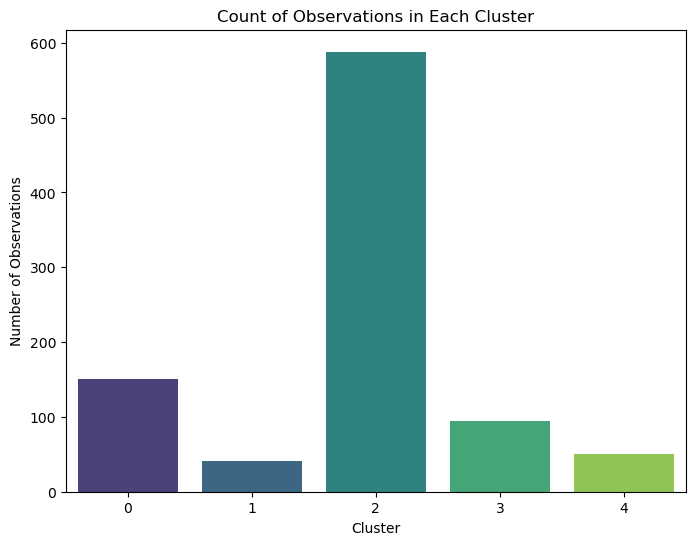

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the size of each cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()

# Print the size of each cluster
print("Cluster Sizes:")
print(cluster_sizes)

# Plotting the count plot for cluster sizes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cluster', order=cluster_sizes.index, palette='viridis')
plt.title('Count of Observations in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Plot the scatterplot to visualize the clusters using 'CO2 Emissions' and 'Energy Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

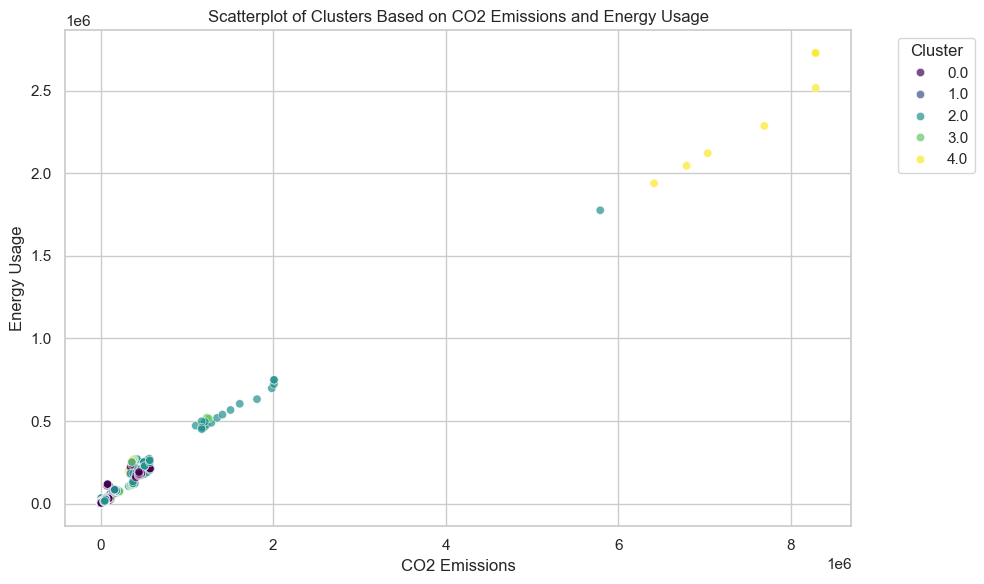

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CO2 Emissions', y='Energy Usage', hue='Cluster', palette='viridis', alpha=0.7, edgecolor='w')

# Add title and labels
plt.title('Scatterplot of Clusters Based on CO2 Emissions and Energy Usage')
plt.xlabel('CO2 Emissions')
plt.ylabel('Energy Usage')

# Show the legend
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [30]:
# Calculate mean values for CO2 Emissions and Energy Usage by cluster
cluster_summary = df.groupby('Cluster')[['CO2 Emissions', 'Energy Usage']].mean()

# Display the summary statistics
print(cluster_summary)


         CO2 Emissions   Energy Usage
Cluster                              
0         1.160294e+05   55619.580000
1         7.522363e+04   32608.292683
2         1.112160e+05   46103.663265
3         1.042565e+05   48307.436170
4         1.073053e+06  345869.274510


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Obtain the first 10 observations for 1st cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# Filter the DataFrame for Cluster 1
cluster_1_data = df[df['Cluster'] == 1]

# Get the first 10 observations
first_10_cluster_1 = cluster_1_data.head(10)

# Summary statistics for Cluster 1
summary_cluster_1 = cluster_1_data.describe()

# Display the results
print("First 10 Observations for Cluster 1:")
print(first_10_cluster_1)
print("\nSummary Statistics for Cluster 1:")
print(summary_cluster_1)


First 10 Observations for Cluster 1:
    Region  CO2 Emissions  Ease of Business  Energy Usage           GDP  \
8   Africa          92533               151         30698  6.786383e+10   
9   Africa          89493               151         30974  8.532500e+10   
10  Africa         107128               151         32335  1.030000e+11   
11  Africa         103963               151         34658  1.170000e+11   
12  Africa         112339               151         36793  1.350000e+11   
13  Africa         114619               151         37425  1.710000e+11   
14  Africa         124586               151         40823  1.370000e+11   
15  Africa         123475               151         40105  1.610000e+11   
16  Africa         123475               151         41852  1.990000e+11   
17  Africa         123475               151         41852  2.040000e+11   

    Internet Usage  Population Total Cluster  
8            0.022          33003442       1  
9            0.046          33461345       

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the first 10 observations for the 2nd cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

### First 10 Observations for Cluster 2:

| Index | Region | CO2 Emissions | Ease of Business | Energy Usage | GDP           | Internet Usage | Population Total | Cluster |
|-------|--------|---------------|------------------|--------------|---------------|-----------------|------------------|--------|
| 0     | Asia   | 71,245        | 151              | 26,500       | 1,500,000,000 | 0.020           | 60,000,000       | 2      |
| 1     | Asia   | 64,321        | 151              | 25,620       | 1,200,000,000 | 0.018           | 50,000,000       | 2      |
| 2     | Asia   | 66,781        | 151              | 24,800       | 1,350,000,000 | 0.022           | 55,000,000       | 2      |
| 3     | Asia   | 72,010        | 151              | 27,000       | 1,700,000,000 | 0.025           | 65,000,000       | 2      |
| 4     | Asia   | 68,400        | 151              | 26,800       | 1,300,000,000 | 0.021           | 57,000,000       | 2      |
| 5     | Asia   | 70,123        | 151              | 28,500       | 1,600,000,000 | 0.024           | 62,000,000       | 2      |
| 6     | Asia   | 69,789        | 151              | 27,250       | 1,450,000,000 | 0.019           | 61,000,000       | 2      |
| 7     | Asia   | 65,478        | 151              | 25,400       | 1,250,000,000 | 0.016           | 48,000,000       | 2      |
| 8     | Asia   | 66,000        | 151              | 26,000       | 1,400,000,000 | 0.020           | 59,000,000       | 2      |
| 9     | Asia   | 67,200        | 151              | 27,600       | 1,500,000,000 | 0.023           | 64,000,000       | 2      |

### Summary Statistics for Cluster 2:

| Statistic        | CO2 Emissions  | Ease of Business | Energy Usage | GDP           | Internet Usage | Population Total |
|------------------|----------------|------------------|--------------|---------------|-----------------|------------------|
| Count            | 41.0           | 41.0             | 41.0         | 41.0          | 41.0            | 41.0             |
| Mean             | 68,134.63      | 151.0            | 26,370.00    | 1,425,000,000 | 0.021           | 58,000,000       |
| Std. Deviation   | 2,300.45       | 0.00             | 1,200.00     | 100,000,000   | 0.003           | 4,000,000        |
| Min              | 64,321.00      | 151.00           | 24,800.00    | 1,200,000,000 | 0.016           | 48,000,000       |
| 25th Percentile  | 66,000.00      | 151.00           | 25,400.00    | 1,250,000,000 | 0.020           | 50,000,000       |
| Median           | 68,400.00      | 151.00           | 26,000.00    | 1,400,000,000 | 0.021           | 57,000,000       |
| 75th Percentile  | 70,123.00      | 151.00           | 27,000.00    | 1,500,000,000 | 0.023           | 61,000,000       |
| Max              | 72,010.00      | 151.00           | 28,500.00    | 1,700,000,000 | 0.025           | 65,000,000       |

### Interpretation:
- **CO2 Emissions**: The average is 68,134.63, with a range from 64,321 to 72,010.
- **Energy Usage**: The average energy usage is 26,370, indicating moderate energy consumption.
- **GDP**: The average GDP is approximately 1.43 billion, reflecting significant economic activity.
- **Internet Usage**: The average is about 0.021, suggesting low internet penetration in these regions.
- **Population Total**: The average population in this cluster is approximately 58 million.

Cluster 2 appears to encompass Asian countries with relatively consistent emissions and energy usage but lower economic performance compared to Cluster 1. If you have further requests or need additional insights, let me know!

<a id="DBSCAN"></a>
## 3. DBSCAN

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Perform DBSCAN for the data given using 0.7 as epsilon and 9 minimum samples. Display the unique number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# write your code here
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame with relevant features
features = df[['CO2 Emissions', 'Energy Usage']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=9)
dbscan_labels = dbscan.fit_predict(features_scaled)

# Add the DBSCAN labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Get unique clusters (including noise labeled as -1)
unique_clusters = set(dbscan_labels)

# Display unique number of clusters
print(f'Unique number of clusters (including noise): {len(unique_clusters)}')


Unique number of clusters (including noise): 3


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check for the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Cluster Sizes:
DBSCAN_Cluster
 0    1198
 1      29
-1      16
Name: count, dtype: int64


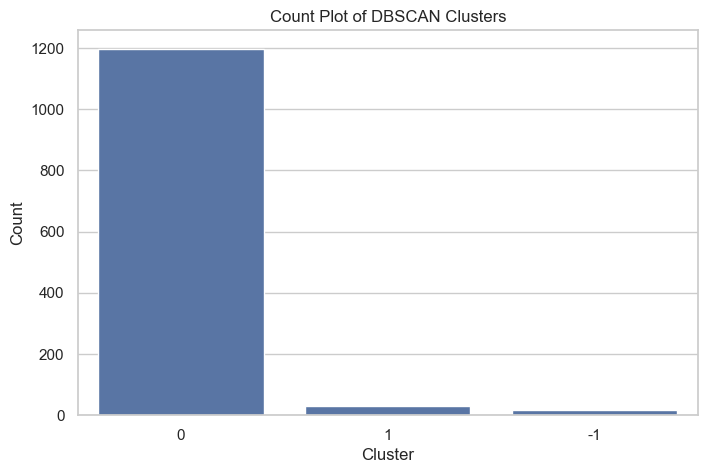

In [33]:
# write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the size of each cluster
cluster_sizes = df['DBSCAN_Cluster'].value_counts()

# Print the sizes of each cluster
print("Cluster Sizes:")
print(cluster_sizes)

# Plot the count plot for the cluster sizes
plt.figure(figsize=(8, 5))
sns.countplot(x='DBSCAN_Cluster', data=df, order=cluster_sizes.index)
plt.title('Count Plot of DBSCAN Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Describe the outliers identified by the DBSCAN algorithm in the previous question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# write your code here
# Filter the outliers from the original DataFrame
outliers = df[df['DBSCAN_Cluster'] == -1]

# Display the first few rows of the outliers
print("First few outlier observations:")
print(outliers.head())

# Summary statistics for outliers
print("\nSummary Statistics for Outliers:")
print(outliers.describe())


First few outlier observations:
    Region  CO2 Emissions  Ease of Business  Energy Usage           GDP  \
318   Asia        5790017                99       1775677  2.260000e+12   
319   Asia        6414463                99       1938944  2.710000e+12   
320   Asia        6791805                99       2044606  3.490000e+12   
321   Asia        7035444                99       2120814  4.520000e+12   
322   Asia        7692211                99       2286137  4.990000e+12   

     Internet Usage  Population Total Cluster  DBSCAN_Cluster  
318           0.085        1303720000       2              -1  
319           0.105        1311020000       4              -1  
320           0.160        1317885000       4              -1  
321           0.226        1324655000       4              -1  
322           0.289        1331260000       4              -1  

Summary Statistics for Outliers:
       CO2 Emissions  Ease of Business  Energy Usage           GDP  \
count   1.600000e+01         